# Running the optimizer with [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

In [1]:
%run -i ../../../examples/prepare_bluesky.py

import bloptools
from bloptools.experiments.tests import Himmelblau

himmelblau = Himmelblau()

In [2]:
boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=himmelblau.dofs, 
                                             dets=[],
                                             bounds=himmelblau.bounds, 
                                             db=db, 
                                             experiment=himmelblau,
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


Transient Scan ID: 1     Time: 2023-04-18 14:35:24
Persistent Unique Scan ID: '18bb9b10-acbe-4aba-997a-9a00f73f4a70'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:35:24.7 |      2.291 |     -1.363 |
|         2 | 14:35:24.7 |      3.541 |     -3.585 |
|         3 | 14:35:24.7 |     -2.709 |     -4.696 |
|         4 | 14:35:24.7 |     -3.959 |     -0.252 |
|         5 | 14:35:24.7 |     -1.459 |      1.970 |
|         6 | 14:35:24.7 |     -0.209 |      0.859 |
|         7 | 14:35:24.7 |      1.041 |      3.082 |
|         8 | 14:35:24.7 |      4.791 |      4.193 |


+-----------+------------+------------+------------+
generator list_scan ['18bb9b10'] (scan num: 1)





         x1        x2     fitness
0  2.290852 -1.362940  -58.753649
1  3.540852 -3.585162  -92.444066
2 -2.709148 -4.696273 -222.255445
3 -3.959148 -0.251828 -138.280117
4 -1.459148  1.970394  -68.562948
5 -0.209148  0.859283 -143.819905
6  1.040852  3.081505  -59.225908
7  4.790852  4.192616 -496.859505


('18bb9b10-acbe-4aba-997a-9a00f73f4a70',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. We can view the state of the optimizer:

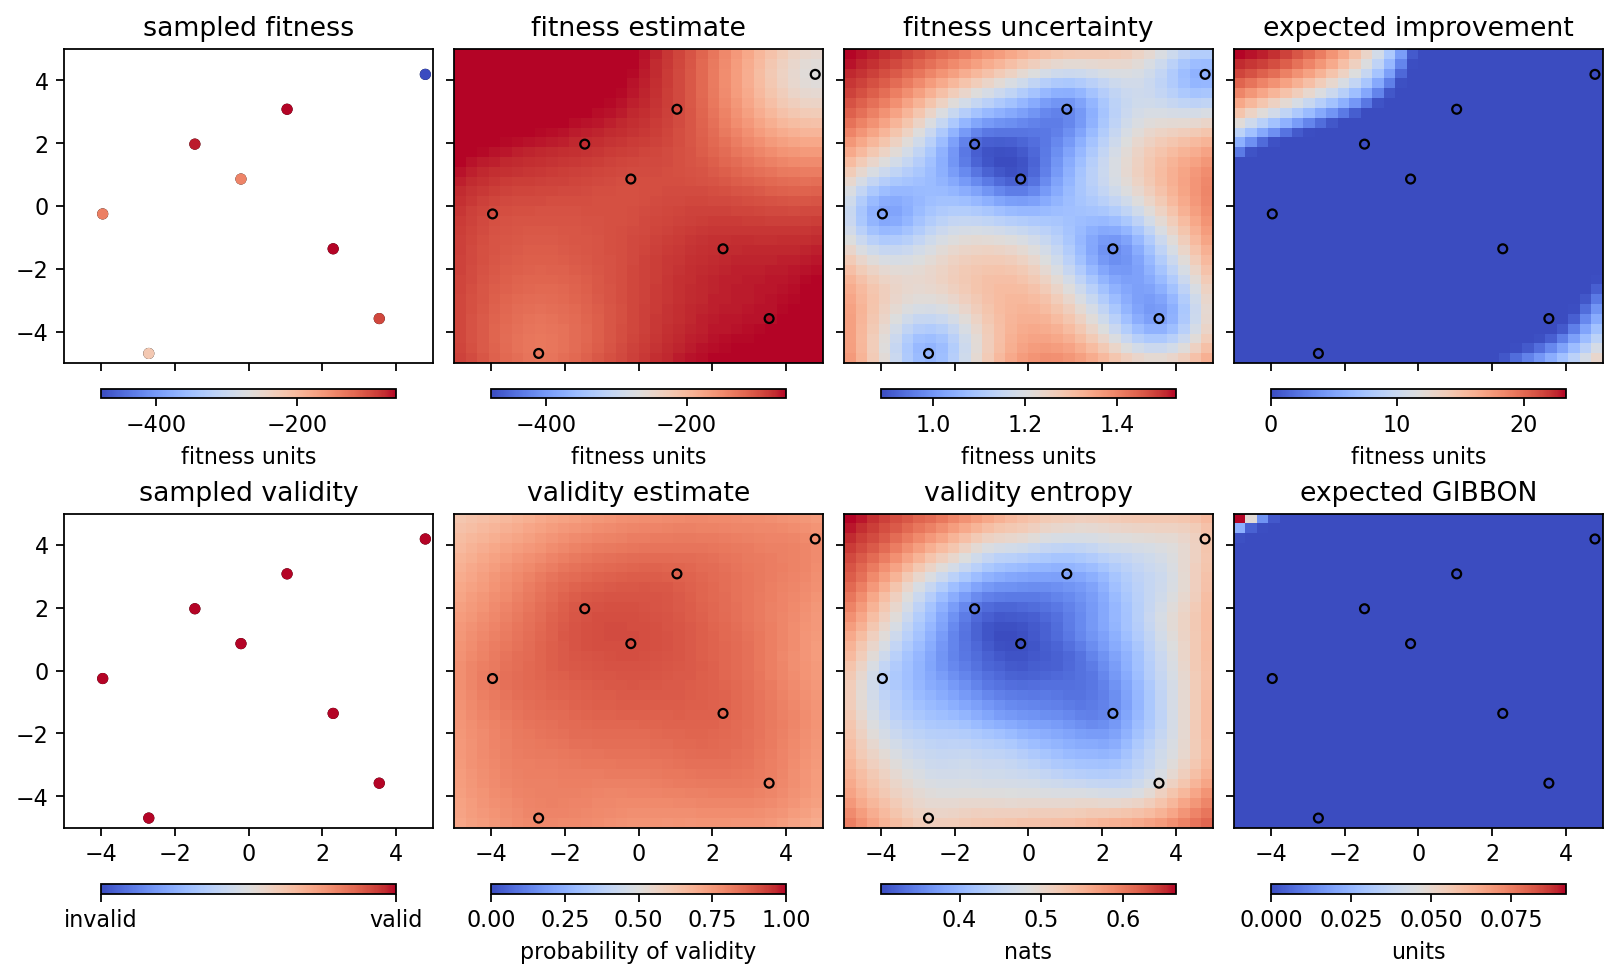

In [3]:
boa.plot_state(gridded=True)

Let's learn a bit more, using the "GIBBON" framework to investigate points that are likely to tell us about the optimum. Running two iterations with four points per iteration:

learning with strategy "eGIBBON" ...




Transient Scan ID: 2     Time: 2023-04-18 14:35:31
Persistent Unique Scan ID: 'a8a38547-93eb-4279-9916-bdbe8b55f219'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:35:31.8 |     -4.899 |      4.670 |
|         2 | 14:35:31.8 |     -4.974 |      4.822 |
|         3 | 14:35:31.8 |     -4.774 |      4.826 |
|         4 | 14:35:31.8 |     -4.921 |      4.851 |
+-----------+------------+------------+------------+
generator list_scan ['a8a38547'] (scan num: 2)





          x1        x2     fitness
8  -4.898515  4.670137 -410.314176
9  -4.974297  4.822029 -471.869581
10 -4.774265  4.825700 -408.753085
11 -4.920585  4.851008 -461.109376




Transient Scan ID: 3     Time: 2023-04-18 14:35:35
Persistent Unique Scan ID: '3d20df9e-c3e8-42a9-b777-427c9f24db35'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:35:35.3 |      4.616 |     -4.916 |
|         2 | 14:35:35.3 |      4.960 |     -4.883 |
|         3 | 14:35:35.4 |      4.876 |     -4.726 |
|         4 | 14:35:35.4 |      4.921 |     -4.669 |
+-----------+------------+------------+------------+
generator list_scan ['3d20df9e'] (scan num: 3)





          x1        x2     fitness
12  4.616144 -4.915526 -503.392160
13  4.959523 -4.883235 -551.407322
14  4.875875 -4.725897 -473.217479
15  4.921311 -4.668618 -461.886392


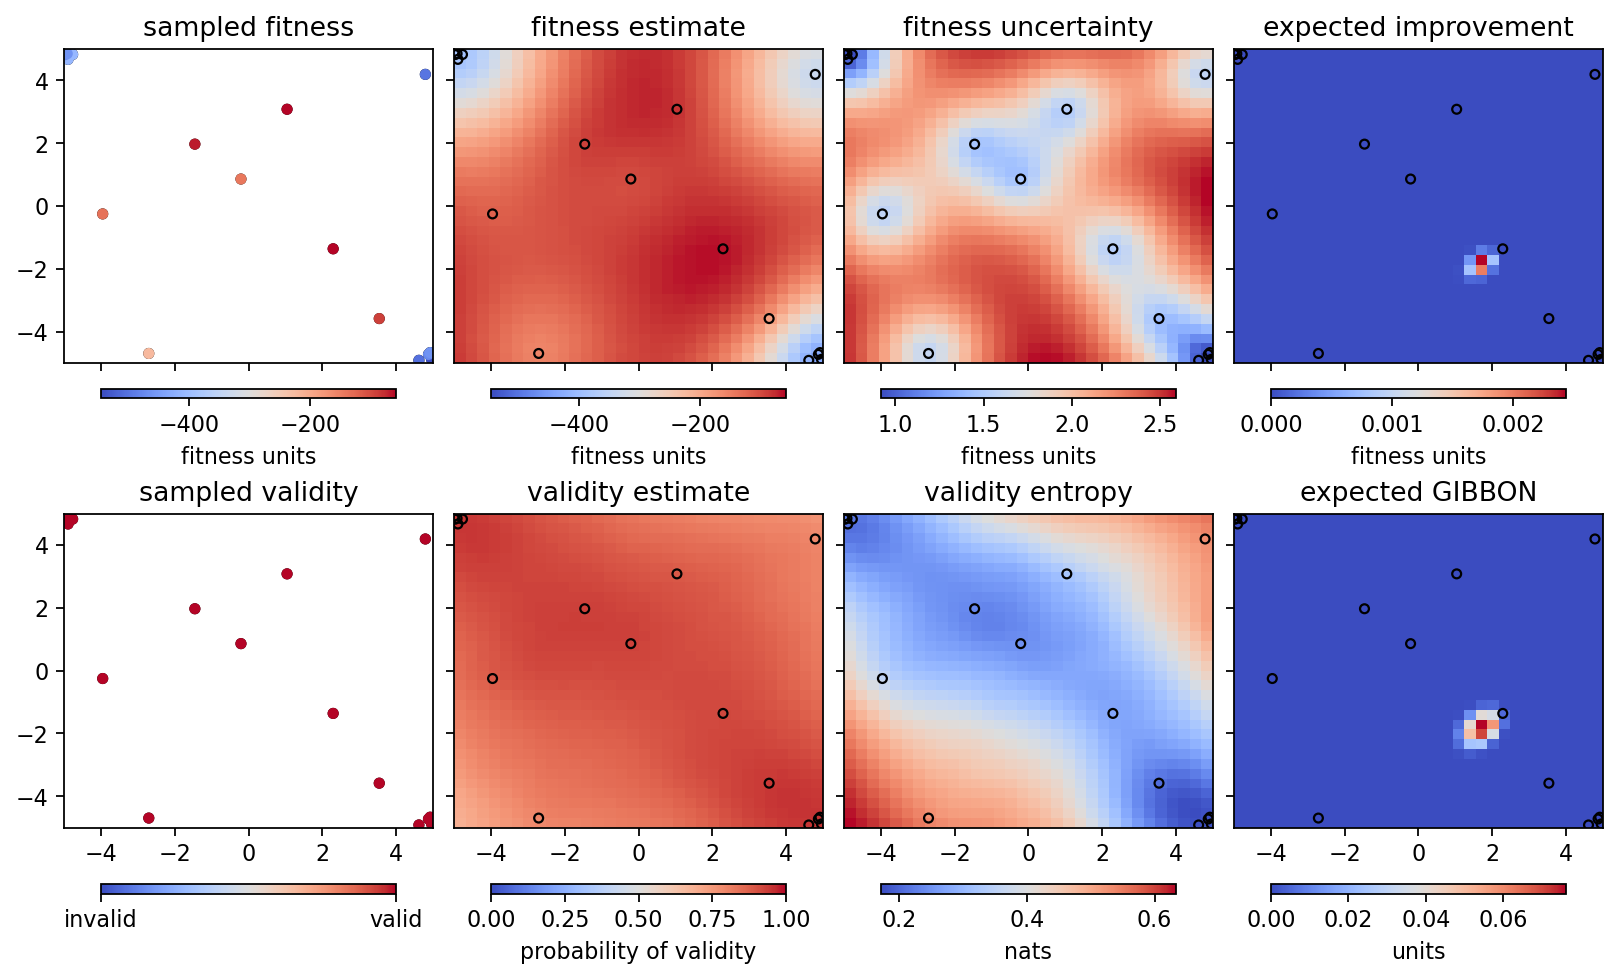

In [4]:
RE(boa.learn(strategy='eGIBBON', n_iter=2, n_per_iter=4))
boa.plot_state(gridded=True)

Now let's try the "EI" strategy to sample where we expect the largest improvement in the fitness:

learning with strategy "eI" ...




Transient Scan ID: 4     Time: 2023-04-18 14:35:42
Persistent Unique Scan ID: 'a94c0794-9ebb-4f2b-8a4c-ead94a9897cf'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:35:42.2 |      1.782 |     -2.014 |
|         2 | 14:35:42.2 |      1.716 |     -1.891 |
|         3 | 14:35:42.2 |      1.793 |     -1.830 |
|         4 | 14:35:42.2 |      2.006 |     -1.428 |
+-----------+------------+------------+------------+
generator list_scan ['a94c0794'] (scan num: 4)





          x1        x2     fitness
16  1.782035 -2.013795  -98.140728
17  1.716259 -1.890652 -101.826426
18  1.793120 -1.830058  -95.895265
19  2.006282 -1.428474  -79.336800




Transient Scan ID: 5     Time: 2023-04-18 14:35:45
Persistent Unique Scan ID: 'd58b33f5-92a3-4336-9192-6b4b39aaf261'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:35:45.4 |     -4.842 |     -4.517 |
|         2 | 14:35:45.4 |     -4.894 |     -4.767 |
|         3 | 14:35:45.4 |     -4.892 |     -4.945 |
|         4 | 14:35:45.4 |     -4.999 |     -4.953 |
+-----------+------------+------------+------------+
generator list_scan ['d58b33f5'] (scan num: 5)





          x1        x2     fitness
20 -4.842095 -4.517329 -136.206892
21 -4.893996 -4.767398 -184.352070
22 -4.892437 -4.944729 -221.560522
23 -4.998660 -4.952801 -238.649968




Transient Scan ID: 6     Time: 2023-04-18 14:35:48
Persistent Unique Scan ID: 'cab831e2-7c6b-4877-a6c8-414100993d9e'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:35:48.5 |      0.246 |      4.822 |
|         2 | 14:35:48.5 |      0.271 |      4.886 |
|         3 | 14:35:48.5 |      0.446 |      4.966 |
|         4 | 14:35:48.5 |      0.547 |      4.876 |
+-----------+------------+------------+------------+
generator list_scan ['cab831e2'] (scan num: 6)





          x1        x2     fitness
24  0.245823  4.821642 -309.482858
25  0.270651  4.886472 -330.547703
26  0.446300  4.965599 -361.785562
27  0.547003  4.876482 -334.150377




Transient Scan ID: 7     Time: 2023-04-18 14:35:51
Persistent Unique Scan ID: '94570611-fe03-46fe-b821-9d364431d610'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 14:35:51.7 |      0.092 |      1.324 |
|         2 | 14:35:51.7 |      3.389 |     -0.880 |
|         3 | 14:35:51.7 |     -0.475 |     -1.463 |
|         4 | 14:35:51.7 |     -4.428 |     -0.119 |
+-----------+------------+------------+------------+
generator list_scan ['94570611'] (scan num: 7)





          x1        x2     fitness
28  0.091915  1.323641 -120.053449
29  3.388590 -0.880171   -8.205027
30 -0.475140 -1.462540 -178.212973
31 -4.427573 -0.119442 -202.241172


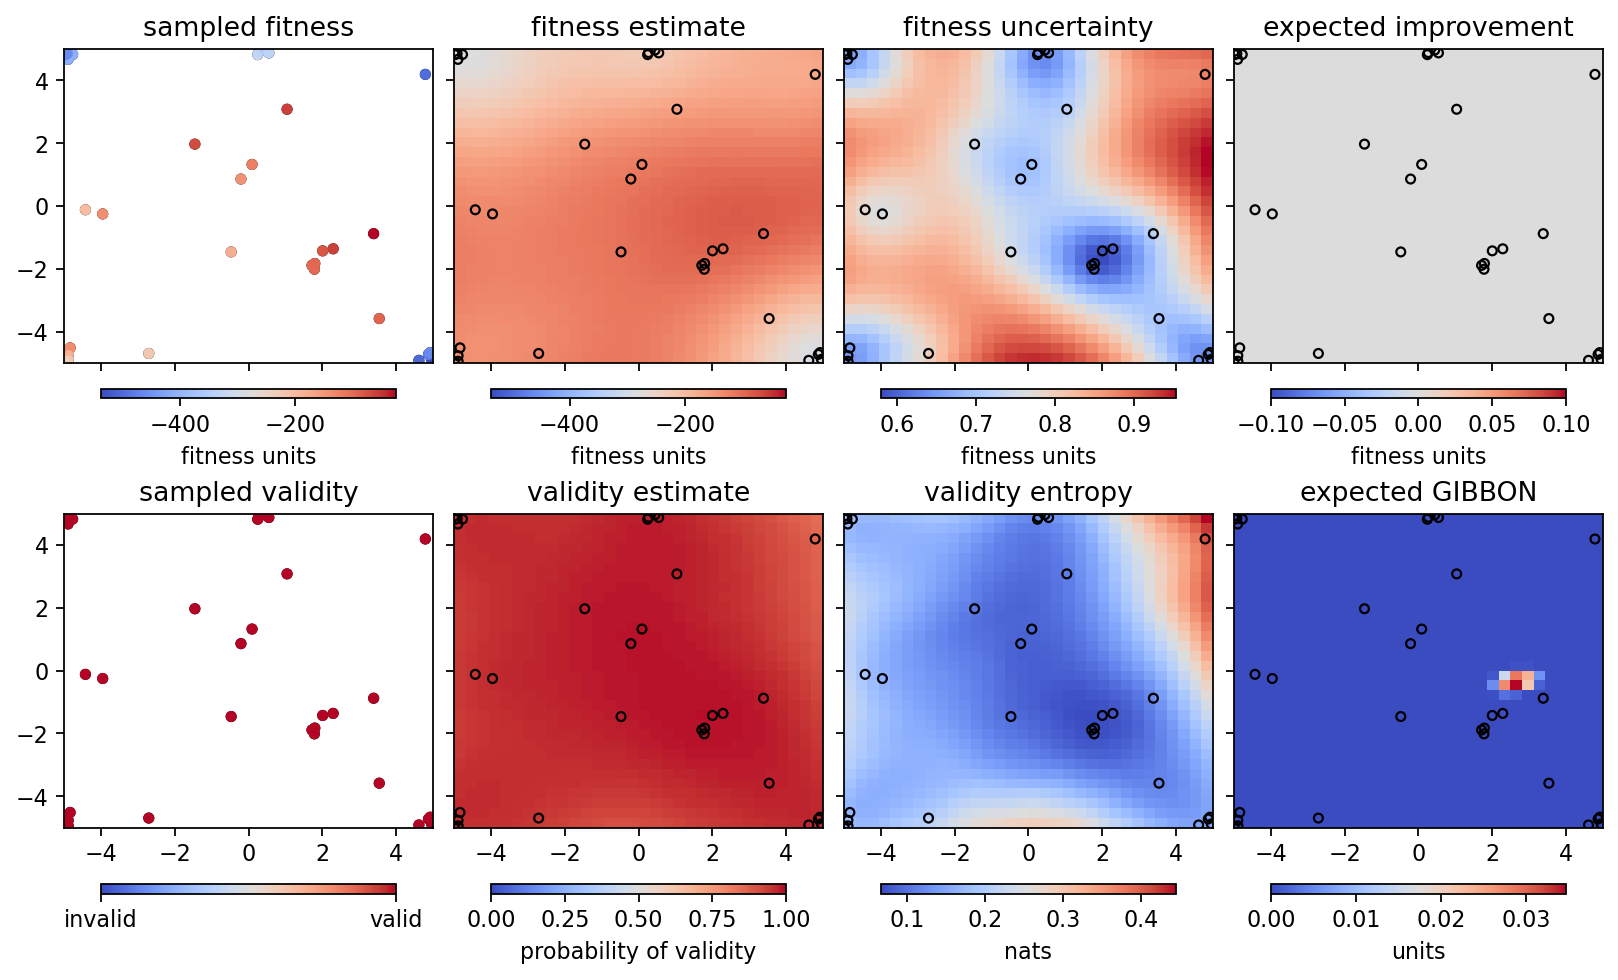

In [5]:
RE(boa.learn(strategy='eI', n_iter=4, n_per_iter=4))
boa.plot_state(gridded=True)